# Математические пакеты. Лабораторная работа №2

Цель работы – практическое применение дискретного преобразования Фурье c
использованием библиотек Python для анализа речевых сигналов.

## Задачи
1. Используя ДПФ построить траекторию основного тона (F0) на записи своего голоса.
2. Используя ДПФ построить траектории второй, третьей и четвертой формантных частот на записи своего голоса
3. Построить сонограмму по записи своего голоса.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import IPython.display as ipd
from scipy.io.wavfile import write, read
import numpy as np
import more_itertools as mit

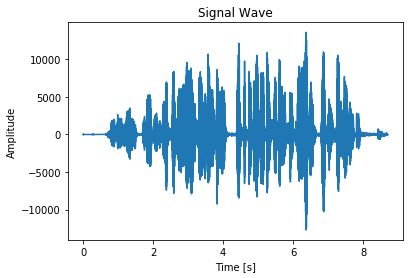

In [65]:
fd, signal = read("audio.wav", "r")
time = np.linspace(0, len(signal) / fd, num=len(signal))
plt.title("Signal Wave")
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.plot(time, signal)
ipd.Audio('audio.wav')

### Используя ДПФ построить траекторию основного тона (F0) на записи своего голоса.

In [125]:
dim = 2048
spectr_res = round(fd/dim)
overlap = 0.25

In [126]:
intervals = list(mit.windowed(signal, n=dim, step=int(overlap*dim)))
# В последнем отрезке возникли None, т.к не хватило элементов на шаг, уберем их
intervals[-1] = [i for i in intervals[-1] if i]
intervals = [i*np.hamming(len(i)) for i in intervals]

In [127]:
def DFT_slow(x):
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)

In [128]:
%%time
intervals = [DFT_slow(i) for i in intervals]

CPU times: user 5min 30s, sys: 8.56 s, total: 5min 39s
Wall time: 1min 4s


In [129]:
amplitude_spec = [sum([j**2 for j in i[:int(len(i)/2)]])**0.5 for i in intervals]
amplitude_spec = np.array([i.real for i in amplitude_spec])

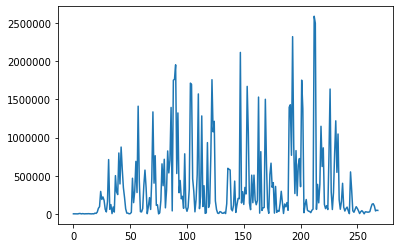

In [130]:
plt.plot(amplitude_spec)

In [131]:
def chunks(lst, n):
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

In [137]:
F0 = []
for i in chunks(amplitude_spec, spectr_res):
    segment = np.array(i)
    if segment.max() > 3*segment.mean():            
        F0 += segment.tolist()
    else:
        F0 += [0 for i in range(len(segment))]

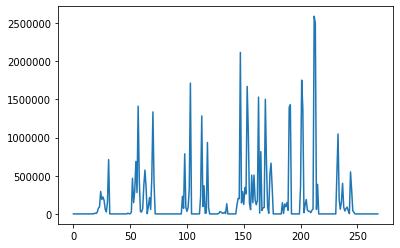

In [138]:
plt.plot(F0)

### Используя ДПФ построить траектории второй, третьей и четвертой формантных частот на записи своего голоса
